<a href="https://colab.research.google.com/github/Srinishaa/GRIP-tasks/blob/main/Exploratory_Data_Analysis_Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact,interact_manual

## Constants

In [ ]:

deliveries='https://raw.githubusercontent.com/bhupen131/Exploratory_Data_Analysis_IPL/main/deliveries.csv'
matches='https://raw.githubusercontent.com/bhupen131/Exploratory_Data_Analysis_IPL/main/matches.csv'

# https://github.com/bhupen131/Exploratory_Data_Analysis_IPL/blob/main/IPL_Dataset_Analysis.ipynb

# Data Pre-processing

In [ ]:
matches_df=pd.read_csv(matches, encoding = "ISO-8859-1")
matches_df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [ ]:
matches_df.drop(columns=['umpire1','umpire2','umpire3'],inplace=True)
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
#checking for NaN values in dataset
matches_df.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [ ]:
matches_df[matches_df['city'].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


On googling the location where the matches were held on above dates, we find that it is Dubai, so replacing the null values in the city column with Dubai

In [ ]:
matches_df.loc[matches_df['city'].isna(),['city']]='Dubai'
matches_df['city'].isnull().sum()

0

In [ ]:
matches_df[matches_df['winner'].isna()],matches_df[matches_df['player_of_match'].isna()]

(        id  season  ... player_of_match                   venue
 300    301    2011  ...             NaN        Feroz Shah Kotla
 545    546    2015  ...             NaN   M Chinnaswamy Stadium
 570    571    2015  ...             NaN   M Chinnaswamy Stadium
 744  11340    2019  ...             NaN  M. Chinnaswamy Stadium
 
 [4 rows x 15 columns],
         id  season  ... player_of_match                   venue
 300    301    2011  ...             NaN        Feroz Shah Kotla
 545    546    2015  ...             NaN   M Chinnaswamy Stadium
 570    571    2015  ...             NaN   M Chinnaswamy Stadium
 744  11340    2019  ...             NaN  M. Chinnaswamy Stadium
 
 [4 rows x 15 columns])

Here, we can observe that when the value of winner is NaN, the corresponding row's player_of_match column is also NaN. Sice there cannot be a player_of_match if there is no winner, the null values are justified.

In [ ]:
# Fixing typo in team name
matches_df.loc[matches_df['winner']=='Rising Pune Supergiant',['winner']]='Rising Pune Supergiants'
matches_df.loc[matches_df['toss_winner']=='Rising Pune Supergiant',['toss_winner']]='Rising Pune Supergiants'
matches_df.loc[matches_df['team1']=='Rising Pune Supergiant',['team1']]='Rising Pune Supergiants'
matches_df.loc[matches_df['team2']=='Rising Pune Supergiant',['team2']]='Rising Pune Supergiants'

In [ ]:
deliveries_df=pd.read_csv(deliveries, encoding = "ISO-8859-1")
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
deliveries_df.isna().sum(), deliveries_df.shape

(match_id                 0
 inning                   0
 batting_team             0
 bowling_team             0
 over                     0
 ball                     0
 batsman                  0
 non_striker              0
 bowler                   0
 is_super_over            0
 wide_runs                0
 bye_runs                 0
 legbye_runs              0
 noball_runs              0
 penalty_runs             0
 batsman_runs             0
 extra_runs               0
 total_runs               0
 player_dismissed    170244
 dismissal_kind      170244
 fielder             172630
 dtype: int64, (179078, 21))

The null values in player_dismissed, dismissal_kind and fielder are justified since a player need not be dissmissed in every match. They are dissmed only in situations of foul play or health issues or some other inevitable reason.

# Data Visualisation

#*Analysing the IPL teams*

In [ ]:
plt.style.use('dark_background')

## CountPlot of winners

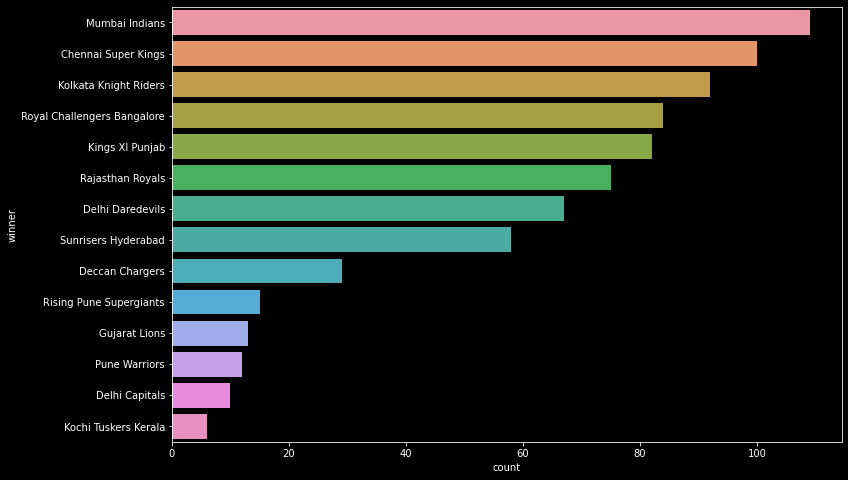

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(y=matches_df['winner'],order = matches_df['winner'].value_counts().index)
plt.show()

## Toss impact on teams

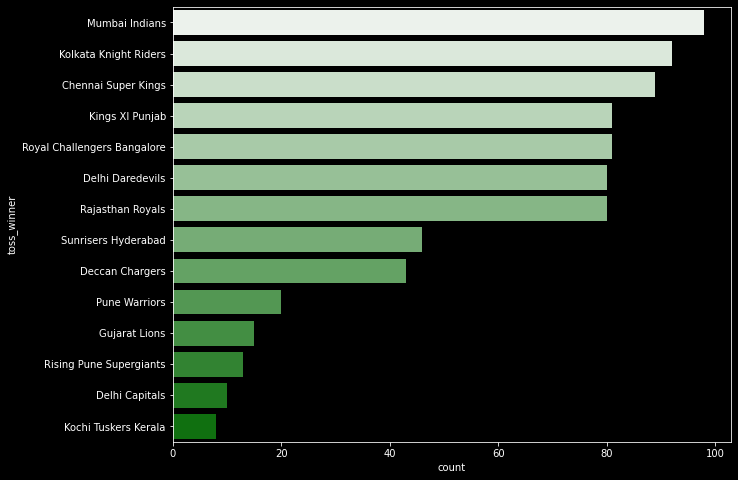

In [ ]:

plt.figure(figsize=(10,8))
sns.countplot(y=matches_df['toss_winner'],order=matches_df['toss_winner'].value_counts().index,palette='light:g')
plt.show()


OBSERVATION -> <br>
1)Mumbai Indians are at the top position by winning the most number of matches followed by Chennai super kings, Kolkata Knight Riders and so on. <br>
2)The teams that won the toss the most also seems to be almost the same  as the teams that have won the most matches. So we can say that the winning the toss does have a positive effect in determining the team's victory.

## Trend of no. of matches won every year by top 4 teams

In [ ]:
winning_trend=pd.crosstab(matches_df.season,matches_df.winner)
winning_trend=winning_trend[['Mumbai Indians','Chennai Super Kings','Kolkata Knight Riders','Royal Challengers Bangalore']]

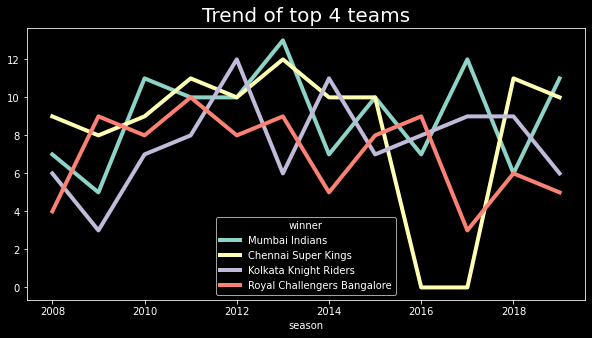

In [ ]:
winning_trend.plot(linewidth=4,figsize=(10,5))
plt.title('Trend of top 4 teams',fontsize=20)
plt.show()
# No. of matches won is 0 for csk in the year 2016 and 2017 since during a ban was inpose on csk during that period

## To analyse if fielding is chosen most or batting is chosen most by teams that won the toss

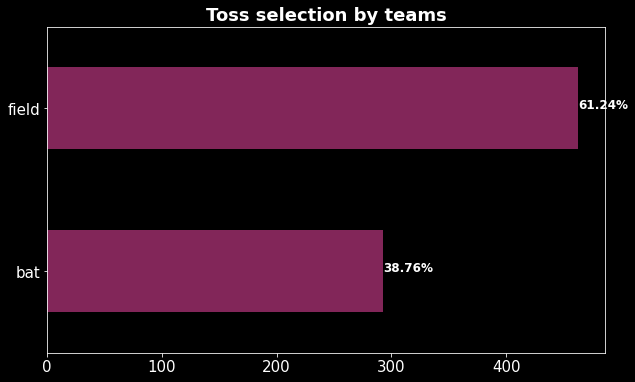

In [ ]:

toss_count = matches_df.toss_decision.value_counts().plot.barh(figsize=(10,6), color='#822659', fontsize=15)
toss_count.set_title('Toss selection by teams', fontsize=18,fontweight = 'bold')
toss_count.set_xlabel('', fontsize=18, fontweight = 'bold')
toss_count.invert_yaxis()

totals=[]
# find the values and append to list
for i in toss_count.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in toss_count.patches:
    # Fixing the width of the mark labels ( get_height pushes the mark label up or down & get_x pulls left or right)
    toss_count.text(i.get_width()+0.25, i.get_y()+0.25, str(round((i.get_width()/total)*100,2))+'%',fontsize=12,fontweight='bold', color='white')

## Teams that won the IPL trophy

In [ ]:

seasons=sorted(matches_df['season'].unique())

title_winner={}
for i in seasons:
  title_winner[i]=matches_df[matches_df.season==i]['winner'].value_counts().index[0]

title_winner=pd.DataFrame.from_dict([title_winner]).T
title_winner.rename(columns={0:'winner'},inplace=True)
title_winner.index.name='year'
title_winner

,winner
year,
2008,Rajasthan Royals
2009,Delhi Daredevils
2010,Mumbai Indians
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kings XI Punjab
2015,Mumbai Indians
2016,Sunrisers Hyderabad


## No. of times teams won IPL

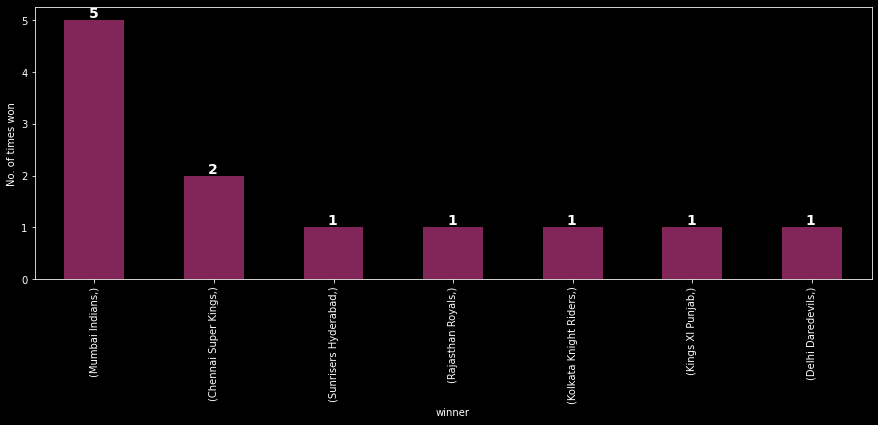

In [ ]:
plt.ylabel('No. of times won')
title=title_winner.value_counts().plot(kind='bar',figsize=(15,5),color='#822659')
for i in title.patches:
  title.text(i.get_x()+0.2,i.get_height()+0.05,
                                  i.get_height(),fontsize=14,
                                  fontweight = 'bold', color='white')
plt.show()

## No. of times teams won after batting first

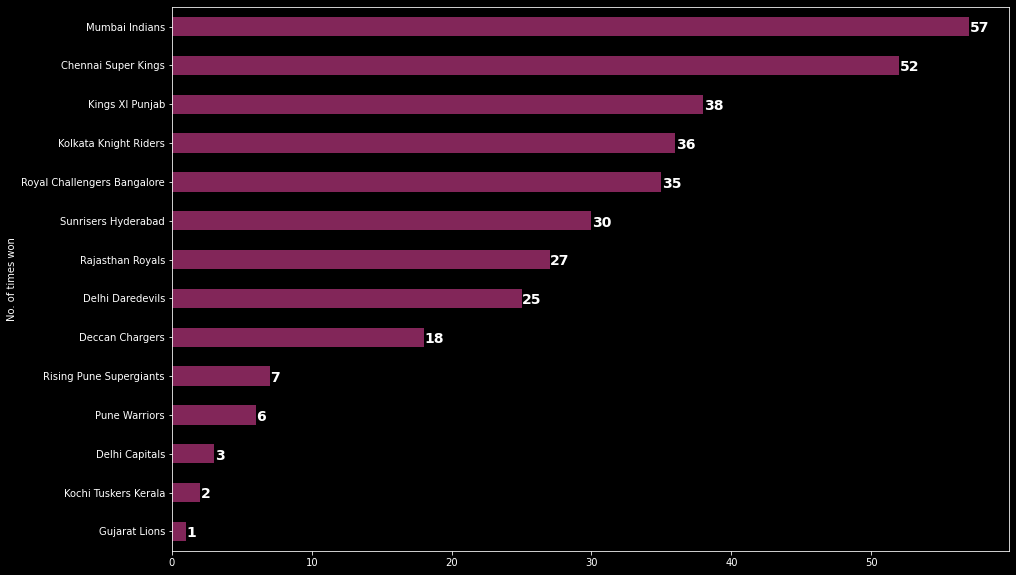

In [ ]:
bat_first=matches_df['winner'][matches_df['win_by_runs']!=0].value_counts()
plt.ylabel('No. of times won')
bat_first=bat_first.plot(kind='barh',figsize=(15,10),color='#822659')
bat_first.invert_yaxis()
for i in bat_first.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    bat_first.text(i.get_width()+.05, i.get_y()+.40,
                                  i.get_width(),fontsize=14,
                                  fontweight = 'bold', color='white')
plt.show()

## No. of times teams won after bowling first

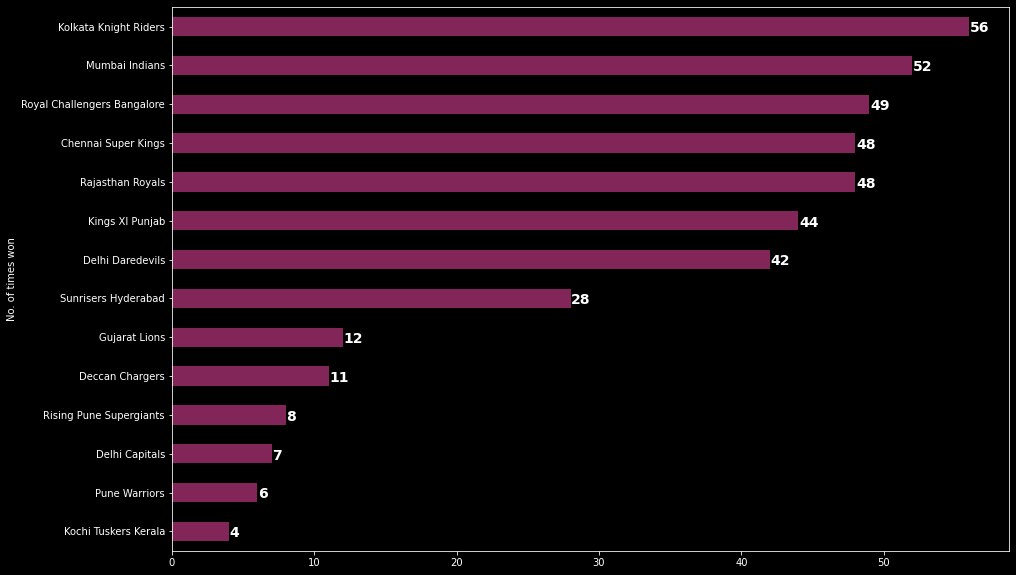

In [ ]:
bat_sec=matches_df['winner'][matches_df['win_by_runs']==0].value_counts()
plt.ylabel('No. of times won')
bat_sec=bat_sec.plot(kind='barh',figsize=(15,10),color='#822659')
bat_sec.invert_yaxis()
for i in bat_sec.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    bat_sec.text(i.get_width()+.05, i.get_y()+.40,
                                  i.get_width(),fontsize=14,
                                  fontweight = 'bold', color='white')
plt.show()

OBSERVATION-><br>
We can see that KKR was more successful upon chasing the target whereas MI won many games by defending the target. CSK seems to be winning by both chasing and defending the target consistently.

## Teams that won with max wickets

In [ ]:
matches_df.win_by_wickets.max()

10

In [ ]:
matches_df.loc[matches_df.win_by_wickets==10][['season','team1','team2','winner']]

,season,team1,team2,winner
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
34,2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab
71,2008,Mumbai Indians,Deccan Chargers,Deccan Chargers
119,2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils
183,2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore
298,2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals
376,2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians
390,2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
542,2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore
590,2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad


## Teams that won with max runs

In [ ]:
matches_df.win_by_runs.max()

146

In [ ]:
matches_df.loc[matches_df.win_by_runs==146][['season','team1','team2','winner']]

,season,team1,team2,winner
43,2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians


#*Analysing IPL players*

#Bar graph of player_of_match(top 20)

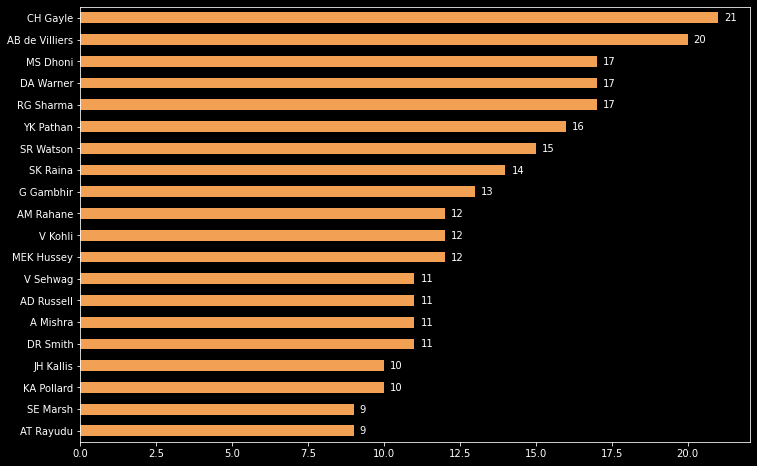

In [ ]:
pom=matches_df['player_of_match'].value_counts().head(20).plot(kind='barh',figsize=(12,8),color='#f2a154')
pom.invert_yaxis()
for i in pom.patches:
  pom.text(i.get_width()+0.2,i.get_y()+.40,i.get_width())

plt.show()

Chris Gayle has won the most 'Player of the match' titles in the past 14 seasons

## Batsmen that played the most deliveries(top 10)

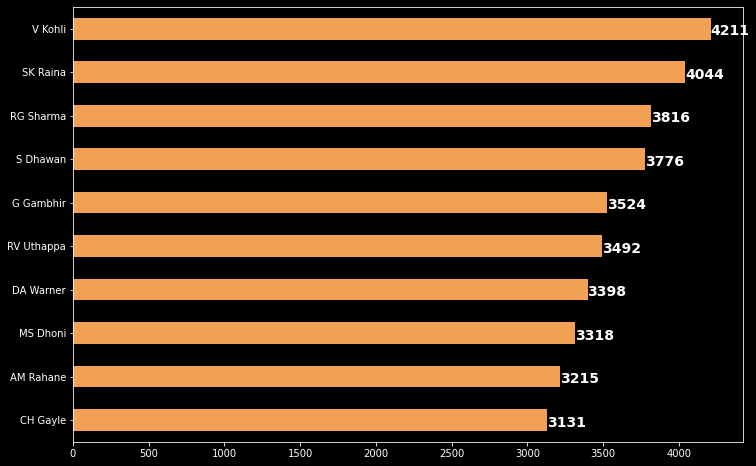

In [ ]:
batsmen=deliveries_df['batsman'].value_counts().head(10).plot(kind='barh',figsize=(12,8),color='#f2a154')
batsmen.invert_yaxis()

for i in batsmen.patches:
   batsmen.text(i.get_width()+.05, i.get_y()+.40,
                                  i.get_width(),fontsize=14,
                                  fontweight = 'bold', color='white')
plt.show()

## Bowlers with most deliveries(top 10)

In [ ]:
deliveries_df.loc[40:100,:]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
40,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,7,3,MC Henriques,S Dhawan,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
41,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,7,4,S Dhawan,MC Henriques,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
42,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,7,5,MC Henriques,S Dhawan,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
43,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,7,6,S Dhawan,MC Henriques,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
44,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,1,S Dhawan,MC Henriques,TM Head,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,4,DJ Hooda,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
97,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,5,Yuvraj Singh,DJ Hooda,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
98,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,6,DJ Hooda,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
99,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,1,DJ Hooda,Yuvraj Singh,TS Mills,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


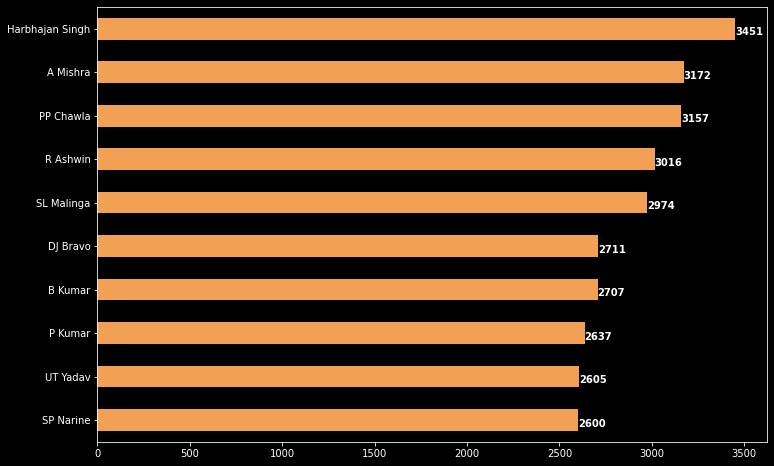

In [ ]:
bowler=deliveries_df['bowler'].value_counts().head(10).plot(kind='barh',figsize=(12,8),color='#f2a154')
bowler.invert_yaxis()

for i in bowler.patches:
   bowler.text(i.get_width(), i.get_y()+0.4,
                                  i.get_width(),
                                  fontweight = 'bold', color='white')
plt.show()

## Batsmen with the most no. of runs(top 10)

In [ ]:
most_runs=deliveries_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[0:10]
most_runs

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

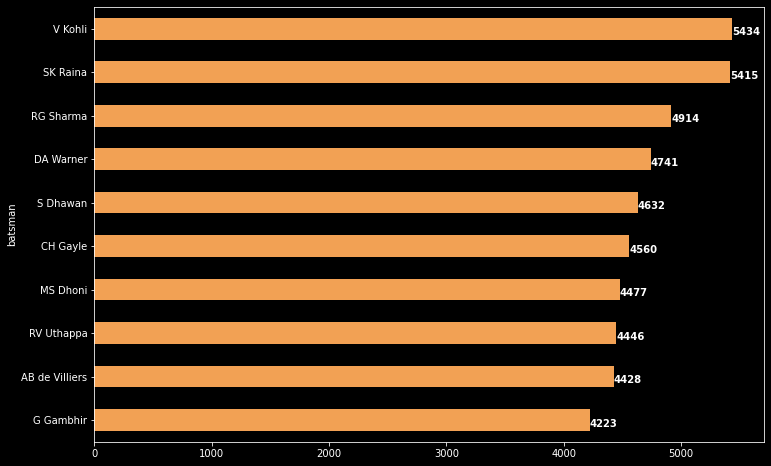

In [ ]:
batsmen=most_runs.plot(kind='barh',figsize=(12,8),color='#f2a154')
batsmen.invert_yaxis()

for i in batsmen.patches:
   batsmen.text(i.get_width(), i.get_y()+0.4,
                                  i.get_width(),
                                  fontweight = 'bold', color='white')
plt.show()

## Trend Plot analysing performance of top 3 players

Merging matches and deliveries dataset

In [ ]:
df = pd.merge(matches_df,deliveries_df, left_on = 'id', right_on = 'match_id')
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'match_id', 'inning',
       'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind',
       'fielder'],
      dtype='object')

In [ ]:
kohli=df[df['batsman']=='V Kohli'].groupby('season')['batsman_runs'].sum()
raina=df[df['batsman']=='SK Raina'].groupby('season')['batsman_runs'].sum()
sharma=df[df['batsman']=='RG Sharma'].groupby('season')['batsman_runs'].sum()

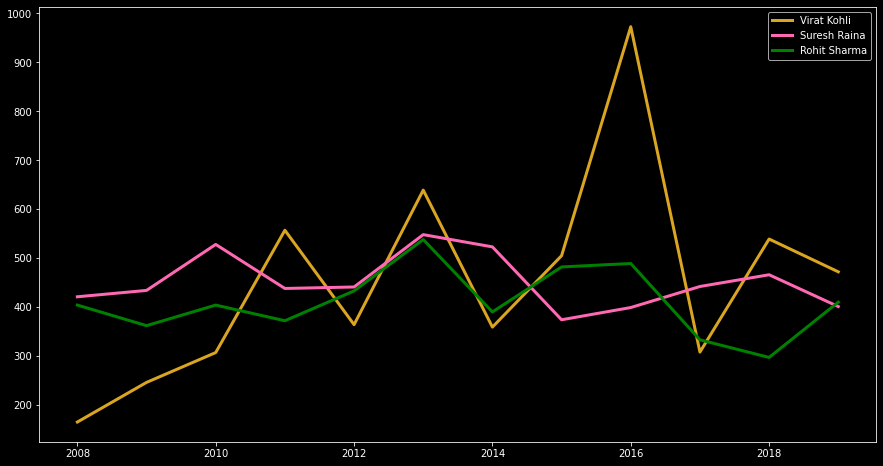

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(kohli, linewidth = 3,color = 'goldenrod', label = 'Virat Kohli')
plt.plot(raina, linewidth = 3,color = 'hotpink', label = 'Suresh Raina')
plt.plot(sharma, linewidth = 3,color = 'green', label = 'Rohit Sharma')
plt.legend()

Raina's and Rohit's performances are consistent. Virats's performance either gets too high or too low. 

##Top 10 Venues that hosted the most matches

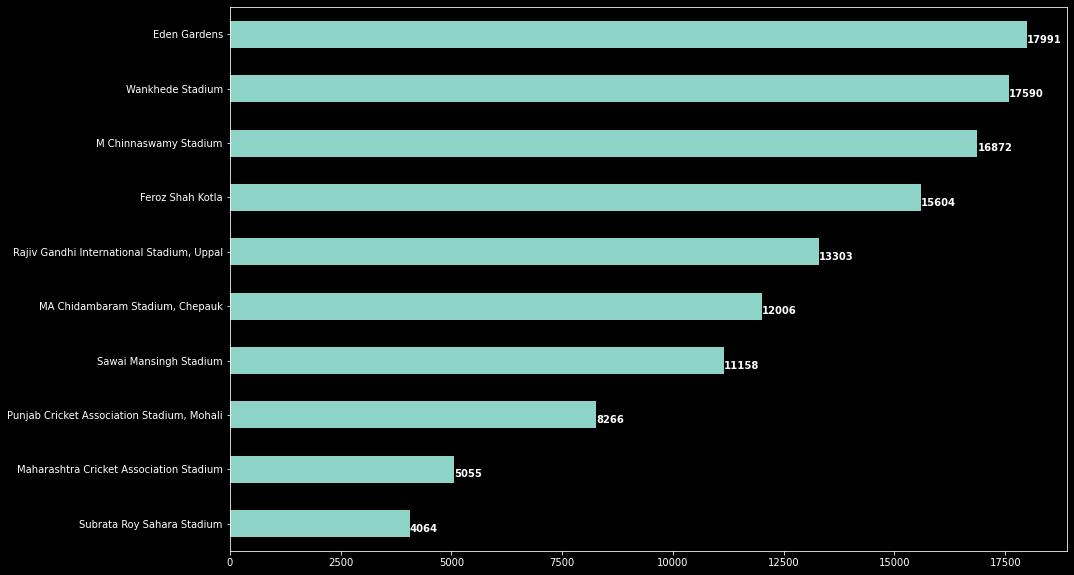

In [ ]:
plt.figure(figsize=(15,10))
venue=df.venue.value_counts().head(10).plot(kind='barh')
venue.invert_yaxis()

for i in venue.patches:
  venue.text(i.get_width(), i.get_y()+0.4,i.get_width(), fontweight = 'bold', color='white')
plt.show()

## Total no. of matches per seson

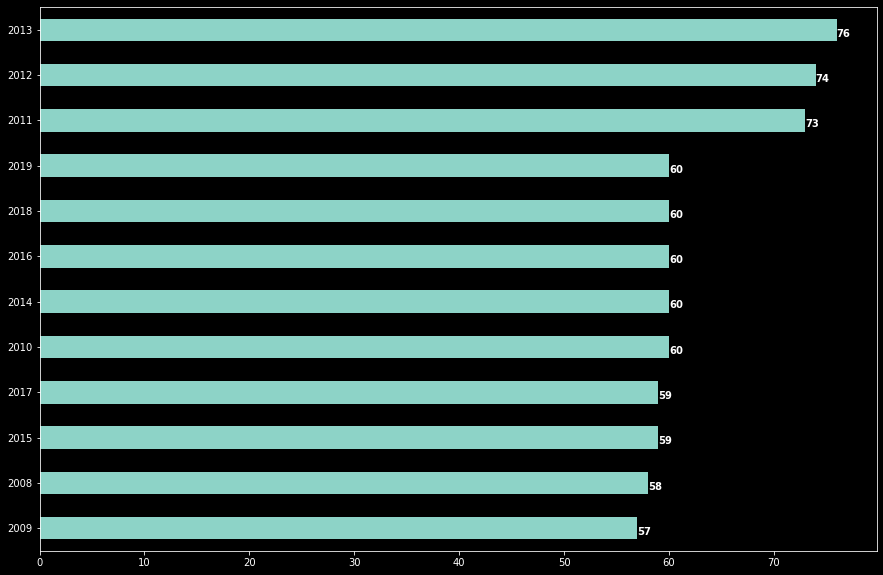

In [ ]:
plt.figure(figsize=(15,10))
matches=matches_df.season.value_counts().plot(kind='barh')
matches.invert_yaxis()

for i in matches.patches:
  matches.text(i.get_width(), i.get_y()+0.4,i.get_width(), fontweight = 'bold', color='white')
plt.show()